In [1]:
import pandas as pd
import numpy as np
import math
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn import model_selection
csv_data = pd.read_csv('SLM_DATA_IF.csv')  # 读取数据

In [2]:
#预测指标（涨跌），基于每日交易
csv_data["updown"] = 1
day = 1
for i in range(day,len(csv_data)):
    if(csv_data.loc[i,"CLOSE"]-csv_data.loc[i-day,"CLOSE"]>=0):
        csv_data.loc[i-day,"updown"]=1
    else:
        csv_data.loc[i-day,"updown"]=-1

In [3]:
middata =[]
middata=pd.DataFrame(middata)

In [20]:
#Alpha#53
for i in range(100,len(csv_data)):
    middata.loc[i,'Alpha53'] = (2*csv_data.loc[i,'CLOSE']-csv_data.loc[i,'LOW']-csv_data.loc[i,'HIGH'])/(csv_data.loc[i,'CLOSE']-csv_data.loc[i,'LOW']+0.0001)
for i in range(200,len(csv_data)):    
    csv_data.loc[i,'Alpha53'] = -middata.loc[i,'Alpha53']+middata.loc[i-15,'Alpha53']

In [42]:
#191因子库
#Alpha2
for i in range(100,len(csv_data)):
    middata.loc[i,'191Alpha2'] = (2*csv_data.loc[i,'CLOSE']-csv_data.loc[i,'LOW']-csv_data.loc[i,'HIGH'])/(csv_data.loc[i,'HIGH']-csv_data.loc[i,'LOW']+0.0001)
for i in range(200,len(csv_data)):
    csv_data.loc[i,'191Alpha2'] = -middata.loc[i,'191Alpha2']+middata.loc[i-16,'191Alpha2']
#Alpha3
for i in range(100,len(csv_data)): 
    if(csv_data.loc[i,"CLOSE"]>csv_data.loc[i-1,"CLOSE"]):
        middata.loc[i,'k1'] = min(csv_data.loc[i,"LOW"],csv_data.loc[i-1,"CLOSE"])
    else:
        middata.loc[i,'k1'] = max(csv_data.loc[i,"HIGH"],csv_data.loc[i-1,"CLOSE"])
for i in range(100,len(csv_data)): 
    if(csv_data.loc[i,"CLOSE"] == csv_data.loc[i-1,"CLOSE"]):
        middata.loc[i,'191Alpha3'] = 0
    else:
        middata.loc[i,'191Alpha3'] = csv_data.loc[i,"CLOSE"]-middata.loc[i,'k1']
for i in range(200,len(csv_data)): 
    csv_data.loc[i,'191Alpha3'] = np.sum(middata.loc[i-11:i,'191Alpha3'])
#Alpha11
for i in range(100,len(csv_data)):
    middata.loc[i,'191Alpha11'] = csv_data.loc[i,'VOLUME']*(2*csv_data.loc[i,'CLOSE']-csv_data.loc[i,'LOW']-csv_data.loc[i,'HIGH'])/(csv_data.loc[i,'HIGH']-csv_data.loc[i,'LOW']+0.0001)
for i in range(200,len(csv_data)):
    csv_data.loc[i,'191Alpha11'] = np.sum(middata.loc[i-6:i,'191Alpha11'])
#Alpha14
for i in range(100,len(csv_data)):
    csv_data.loc[i,'191Alpha14'] = csv_data.loc[i,'CLOSE']-csv_data.loc[i-5,'CLOSE']
#Alpha14
for i in range(100,len(csv_data)):
    csv_data.loc[i,'191Alpha14'] = csv_data.loc[i,'CLOSE']-csv_data.loc[i-17,'CLOSE']
#Alpha15
for i in range(100,len(csv_data)):
    csv_data.loc[i,'191Alpha15'] = csv_data.loc[i,'OPEN']/(csv_data.loc[i,'CLOSE']-csv_data.loc[i-5,'CLOSE'])-1
#Alpha18
for i in range(100,len(csv_data)):
    csv_data.loc[i,'191Alpha18'] = csv_data.loc[i,'CLOSE']/csv_data.loc[i-5,'CLOSE']
#Alpha18
for i in range(100,len(csv_data)):
    csv_data.loc[i,'191Alpha18'] = csv_data.loc[i,'CLOSE']/csv_data.loc[i-3,'CLOSE']
#Alpha20
for i in range(100,len(csv_data)):
    csv_data.loc[i,'191Alpha20'] = csv_data.loc[i,'CLOSE']/csv_data.loc[i-6,'CLOSE']-1
#Alpha29
for i in range(200,len(csv_data)):    
    csv_data.loc[i,'191Alpha29'] = csv_data.loc[i,"VOLUME"]*(csv_data.loc[i,"CLOSE"]-csv_data.loc[i-7,"CLOSE"])/csv_data.loc[i-7,"CLOSE"]
#Alpha31    
for i in range(200,len(csv_data)):
    csv_data.loc[i,'191Alpha31'] = 1000*(csv_data.loc[i,"CLOSE"]-np.mean(csv_data.loc[i-j:i,"CLOSE"]))/np.mean(csv_data.loc[i-j:i,"CLOSE"])
#Alpha34
for i in range(100,len(csv_data)):
    csv_data.loc[i,'191Alpha34'] = np.mean(csv_data.loc[i-22:i,"CLOSE"])/csv_data.loc[i,"CLOSE"]
#Alpha38
for i in range(200,len(csv_data)): 
    middata.loc[i,'meanhigh'] = np.mean(csv_data.loc[i-j:i,"HIGH"])
for i in range(200,len(csv_data)):
    if(middata.loc[i,'meanhigh']<csv_data.loc[i,"HIGH"]):
        csv_data.loc[i,'191Alpha38'] = -1*csv_data.loc[i-2,"HIGH"]
    else:
        csv_data.loc[i,'191Alpha38'] = 0
#Alpha40
for i in range(100,len(csv_data)): 
    if(csv_data.loc[i,"CLOSE"]>csv_data.loc[i-1,"CLOSE"]):
        middata.loc[i,'close1'] = csv_data.loc[i,"VOLUME"]
    else:
        middata.loc[i,'close1'] = 0
    if(csv_data.loc[i,"CLOSE"]<=csv_data.loc[i-1,"CLOSE"]):
        middata.loc[i,'close2'] = csv_data.loc[i,"VOLUME"]
    else:
        middata.loc[i,'close2'] = 0
for i in range(200,len(csv_data)): 
    csv_data.loc[i,'191Alpha40'] = 100*np.sum(middata.loc[i-33:i,'close1'])/np.sum(middata.loc[i-33:i,'close2'])
#Alpha#60
for i in range(100,len(csv_data)):
    middata.loc[i,'191Alpha60'] = 10000*(2*csv_data.loc[i,'CLOSE']-csv_data.loc[i,'LOW']-csv_data.loc[i,'HIGH'])/((csv_data.loc[i,'HIGH']-csv_data.loc[i,'LOW'])*csv_data.loc[i,'VOLUME']+0.0001)
for i in range(200,len(csv_data)):    
    csv_data.loc[i,'191Alpha60'] = np.sum(middata.loc[i-10:i,'191Alpha60'])
#Alpha78
for i in range(100,len(csv_data)):
    middata.loc[i,'HLC'] = (csv_data.loc[i,"CLOSE"]+csv_data.loc[i,"HIGH"]+csv_data.loc[i,"LOW"])/3
for i in range(200,len(csv_data)):
    middata.loc[i,'meanHLC'] = np.abs(csv_data.loc[i,"CLOSE"]-np.mean(middata.loc[i-13:i,'HLC']))
    csv_data.loc[i,'191Alpha78'] = (middata.loc[i,'HLC']-np.mean(middata.loc[i-13:i,'HLC']))/(0.015*np.mean(middata.loc[i-j:i,'meanHLC']))
#Alpha80
for i in range(100,len(csv_data)):
    csv_data.loc[i,'191Alpha80'] = csv_data.loc[i,"VOLUME"]-csv_data.loc[i-j,"VOLUME"]
#Alpha84
for i in range(200,len(csv_data)):
    if(csv_data.loc[i,'CLOSE']>csv_data.loc[i-1,'CLOSE']):
        middata.loc[i,'191-84'] = csv_data.loc[i,'VOLUME']
    if(csv_data.loc[i,'CLOSE']<csv_data.loc[i-1,'CLOSE']):
        middata.loc[i,'191-84'] = -1*csv_data.loc[i,'VOLUME']
    if(csv_data.loc[i,'CLOSE']==csv_data.loc[i-1,'CLOSE']):
        middata.loc[i,'191-84'] = 0
for i in range(200,len(csv_data)):    
    csv_data.loc[i,'191Alpha84'] = np.mean(middata.loc[i-16:i,'191-84'])
#Alpha93
for i in range(100,len(csv_data)): 
    if(csv_data.loc[i,"OPEN"]>=csv_data.loc[i-1,"OPEN"]):
        middata.loc[i,'191Alpha93'] = 0
    else:
        if((csv_data.loc[i,"OPEN"]-csv_data.loc[i-1,"OPEN"])>=(csv_data.loc[i,"OPEN"]-csv_data.loc[i,"LOW"])):
            middata.loc[i,'191Alpha93'] = csv_data.loc[i,"OPEN"]-csv_data.loc[i-1,"OPEN"]
        else:
            middata.loc[i,'191Alpha93'] = csv_data.loc[i,"OPEN"]-csv_data.loc[i,"LOW"]
for i in range(200,len(csv_data)): 
    csv_data.loc[i,'191Alpha93'] = np.sum(middata.loc[i-j:i,'191Alpha93'])
#Alpha94
for i in range(100,len(csv_data)): 
    if(csv_data.loc[i,"CLOSE"]>csv_data.loc[i-1,"CLOSE"]):
        middata.loc[i,'191Alpha94'] = csv_data.loc[i,"VOLUME"]
    else:
        if(csv_data.loc[i,"CLOSE"]<csv_data.loc[i-1,"CLOSE"]):
            middata.loc[i,'191Alpha94'] = -csv_data.loc[i,"VOLUME"]
        else:
            middata.loc[i,'191Alpha94'] = 0
for i in range(200,len(csv_data)):    
    csv_data.loc[i,'191Alpha94'] = np.sum(middata.loc[i-j:i,'191Alpha94'])
#Alpha100
for i in range(100,len(csv_data)):
    csv_data.loc[i,'191Alpha100'] = np.std(csv_data.loc[i-24:i,"VOLUME"])
#Alpha118
for i in range(100,len(csv_data)):
    middata.loc[i,'hi-op'] = csv_data.loc[i,"HIGH"]-csv_data.loc[i,"OPEN"]
    middata.loc[i,'op-low'] = csv_data.loc[i,"OPEN"]-csv_data.loc[i,"LOW"]
for i in range(200,len(csv_data)):    
    csv_data.loc[i,'191Alpha118'] = 1000*np.sum(middata.loc[i-34:i,'hi-op'])/(np.sum(middata.loc[i-34:i,'op-low'])+0.0001)

In [4]:
#Alpha31    
for i in range(200,len(csv_data)):
    csv_data.loc[i,'191Alpha31'] = 1000*(csv_data.loc[i,"CLOSE"]-np.mean(csv_data.loc[i-20:i,"CLOSE"]))/np.mean(csv_data.loc[i-20:i,"CLOSE"])

In [21]:
#设定参数
N = 400
signal = 0
daystart = 200
dayend = 1600#len(csv_data)-N-1
dailyprofitlv = 0
signal = [0 for x in range(len(csv_data)-N-1)]
profit = [0 for x in range(len(csv_data)-N-1)]
sharpup = [0 for x in range(len(csv_data)-N-1)]

In [22]:
#开始循环(滚动预测)预测updown 使用classifier
for i in range(daystart,dayend):
    data = []
    data=pd.DataFrame(data)
    target = []
    target=pd.DataFrame(target)
    
    #取训练集和测试集
    data["Alpha53"] = csv_data["Alpha53"].loc[i:i+N]
    target = csv_data["updown"].loc[i:i+N]
    
    #对数据集简单处理
    data = data.values
    target = target.values
    train = data[:-1]
    t_train = target[:-1]
    test = data[-1].reshape(1, -1)
    
    #随机森林模型进行预测
    model = RandomForestClassifier(n_estimators=20,random_state=3)
    model.fit(train,t_train)
    predicted = model.predict(test)
    predicted = predicted[0]
    t_test = target[-1].reshape(1, -1)
    t_test = t_test[0][0]
    print(model.feature_importances_)
    print(predicted)
    print(t_test)
    price = csv_data.loc[i+N,'CLOSE']
    tomorrow_price = csv_data.loc[i+N+1,'CLOSE']
    #print(price)
    #print(tomorrow_price)
    if(predicted>0):
        signal[i] = -1
        dailyprofitlv = tomorrow_price/price-1
        profit[i]=signal[i]*dailyprofitlv+profit[i-1]
        sharpup[i] = signal[i]*dailyprofitlv
    else:
        signal[i] = 1
        dailyprofitlv = tomorrow_price/price-1
        profit[i]=signal[i]*dailyprofitlv+profit[i-1]
        sharpup[i] = signal[i]*dailyprofitlv

[1.]
-1
-1
[1.]
1
-1
[1.]
-1
-1
[1.]
-1
1
[1.]
-1
1
[1.]
1
1
[1.]
-1
1
[1.]
-1
-1
[1.]
-1
-1
[1.]
-1
1
[1.]
1
-1
[1.]
-1
-1
[1.]
-1
1
[1.]
-1
-1
[1.]
1
1
[1.]
-1
-1
[1.]
-1
-1
[1.]
1
-1
[1.]
1
1
[1.]
1
1
[1.]
1
-1
[1.]
1
1
[1.]
-1
-1
[1.]
1
-1
[1.]
1
-1
[1.]
-1
-1
[1.]
-1
1
[1.]
1
-1
[1.]
-1
1
[1.]
-1
1
[1.]
-1
-1
[1.]
1
1
[1.]
1
1
[1.]
-1
-1
[1.]
-1
1
[1.]
1
-1
[1.]
-1
1
[1.]
-1
-1
[1.]
1
-1
[1.]
-1
1
[1.]
1
1
[1.]
1
-1
[1.]
1
-1
[1.]
-1
1
[1.]
1
1
[1.]
-1
1
[1.]
-1
1
[1.]
1
1
[1.]
1
-1
[1.]
-1
1
[1.]
1
-1
[1.]
1
-1
[1.]
-1
1
[1.]
-1
-1
[1.]
1
1
[1.]
-1
1
[1.]
1
-1
[1.]
-1
-1
[1.]
-1
1
[1.]
-1
-1
[1.]
-1
-1
[1.]
1
1
[1.]
1
-1
[1.]
-1
1
[1.]
-1
1
[1.]
1
1
[1.]
-1
1
[1.]
1
1
[1.]
1
1
[1.]
1
1
[1.]
-1
1
[1.]
1
1
[1.]
1
-1
[1.]
1
-1
[1.]
-1
-1
[1.]
-1
-1
[1.]
-1
1
[1.]
-1
-1
[1.]
-1
-1
[1.]
1
1
[1.]
1
-1
[1.]
1
1
[1.]
-1
1
[1.]
1
-1
[1.]
1
-1
[1.]
-1
1
[1.]
-1
1
[1.]
-1
-1
[1.]
-1
-1
[1.]
1
-1
[1.]
-1
-1
[1.]
-1
-1
[1.]
1
-1
[1.]
-1
1
[1.]
1
-1
[1.]
-1
1
[1.]
-1
1
[1.]
-1
1
[1.]
-1
1
[1.]

[1.]
-1
1
[1.]
1
1
[1.]
-1
1
[1.]
1
1
[1.]
-1
1
[1.]
-1
1
[1.]
1
-1
[1.]
-1
1
[1.]
1
-1
[1.]
1
1
[1.]
-1
-1
[1.]
-1
-1
[1.]
1
1
[1.]
-1
1
[1.]
1
1
[1.]
1
1
[1.]
1
1
[1.]
-1
-1
[1.]
-1
-1
[1.]
-1
1
[1.]
-1
1
[1.]
1
1
[1.]
-1
1
[1.]
-1
1
[1.]
1
-1
[1.]
-1
1
[1.]
1
-1
[1.]
1
1
[1.]
1
1
[1.]
-1
-1
[1.]
1
1
[1.]
1
-1
[1.]
1
-1
[1.]
-1
1
[1.]
1
1
[1.]
-1
-1
[1.]
1
1
[1.]
1
-1
[1.]
1
-1
[1.]
-1
1
[1.]
1
1
[1.]
-1
1
[1.]
1
1
[1.]
-1
1
[1.]
-1
-1
[1.]
1
-1
[1.]
1
-1
[1.]
1
1
[1.]
-1
1
[1.]
-1
-1
[1.]
-1
-1
[1.]
-1
1
[1.]
-1
1
[1.]
1
1
[1.]
1
1
[1.]
1
-1
[1.]
1
1
[1.]
-1
1
[1.]
-1
-1
[1.]
1
1
[1.]
-1
-1
[1.]
1
-1
[1.]
-1
1
[1.]
-1
1
[1.]
1
-1
[1.]
1
1
[1.]
1
1
[1.]
1
-1
[1.]
-1
1
[1.]
1
-1
[1.]
-1
-1
[1.]
1
1
[1.]
1
1
[1.]
-1
1
[1.]
-1
1
[1.]
1
-1
[1.]
-1
1
[1.]
1
1
[1.]
1
1
[1.]
1
1
[1.]
1
-1
[1.]
1
1
[1.]
-1
1
[1.]
1
1
[1.]
1
-1
[1.]
-1
1
[1.]
1
-1
[1.]
-1
-1
[1.]
1
-1
[1.]
1
1
[1.]
1
-1
[1.]
-1
1
[1.]
-1
1
[1.]
1
-1
[1.]
1
1
[1.]
1
-1
[1.]
-1
-1
[1.]
-1
1
[1.]
-1
1
[1.]
-1
1
[1.]
-1
1
[1.]
1


换手率:0.5021428571428571
1.5311117942267682
0.9053748705574834
-0.037490968179915485
Sharpratio:0.9763351127790053
0.4412216220822365


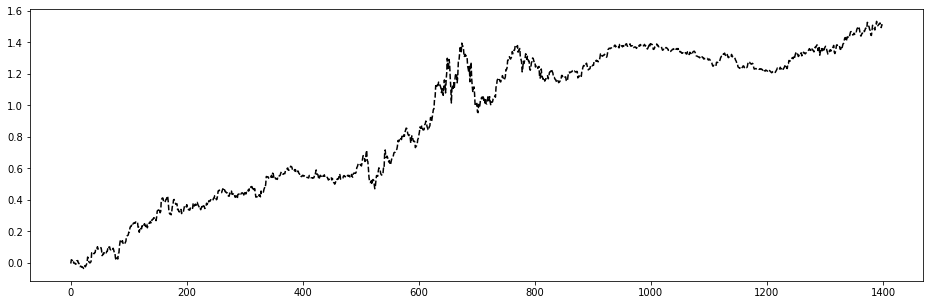

In [23]:
k1 = np.mean(sharpup[daystart:dayend])
k2 = np.std(sharpup[daystart:dayend])
sharpratio = (k1/k2)*np.sqrt(250)
profit = profit[daystart:dayend]
import matplotlib.pyplot as plt
from numpy.random import randn
import math
kkk = signal[daystart:dayend]
count = 1
for i in range(1,dayend-daystart):
    if(kkk[i]+kkk[i-1]==0):
        count = count+1
turnover = count/(dayend-daystart)
print("换手率:"+str(turnover))
plt.figure(figsize=(16, 5))
plt.plot(profit, 'k--')
print(np.max(profit))
print(np.mean(profit))
print(np.min(profit))
print('Sharpratio:'+str(sharpratio))
huiche = 0
for i in range(len(profit)):
    for j in range(i,len(profit)):
        k = profit[i]-profit[j]
        if(k>=huiche):
            huiche = k
print(huiche)

In [15]:
#因子库
# Alpha#101
csv_data["Alpha101"]=(csv_data["CLOSE"]-csv_data["OPEN"])/(csv_data["HIGH"]-csv_data["LOW"]+0.001)
#Alpha#6
for i in range(10,len(csv_data)):
    cor1 =[]
    cor1=pd.DataFrame(cor1)
    cor1['open10'] = csv_data["OPEN"].loc[i-9:i]
    cor1['volume10'] = csv_data["VOLUME"].loc[i-9:i]
    csv_data.loc[i,'Alpha6'] = cor1.corr().values[0][1]    
#Alpha#12
for i in range(10,len(csv_data)):
    middata.loc[i,'volumedelta1'] = csv_data.loc[i,'VOLUME']-csv_data.loc[i-1,'VOLUME']
    middata.loc[i,'closedelta'] = csv_data.loc[i,'CLOSE']-csv_data.loc[i-1,'CLOSE']
    csv_data.loc[i,'Alpha12'] = np.sign(middata.loc[i,'volumedelta1'])*(-1)*middata.loc[i,'closedelta']
#Alpha#9
#middata['closedelta1'] = [0 for x in range(len(csv_data))]
#条件运算符是右结合的，也就是说，从右向左分组计算: a ? b : c ? d : e将按a ? b : (c ? d : e)执行
for i in range(10,len(csv_data)):
    middata.loc[i,'closedelta1'] = csv_data.loc[i,'CLOSE']-csv_data.loc[i-1,'CLOSE']
for i in range(10,len(csv_data)):
    middata.loc[i,'tsminclose1'] = np.min(middata.loc[i-4:i,'closedelta1'])
    middata.loc[i,'tsmaxclose1'] = np.max(middata.loc[i-4:i,'closedelta1'])
t = 0
for i in range(10,len(csv_data)):
    if(middata.loc[i,'tsmaxclose1']<0):
        t = middata.loc[i,'closedelta1']
    else:
        t = -1*middata.loc[i,'closedelta1']
    if(0<middata.loc[i,'tsminclose1']):
        csv_data.loc[i,'Alpha9'] = middata.loc[i,'closedelta1']
    else:
        csv_data.loc[i,'Alpha9'] = t
#Alpha#21    Alpha#21: ((((sum(close, 8) / 8) + stddev(close, 8)) < (sum(close, 2) / 2)) ? (-1 * 1) : 
                                #(((sum(close, 2) / 2) < ((sum(close, 8) / 8) - stddev(close, 8))) ? 1 : 
                                #(((1 < (volume / adv20)) || ((volume / adv20) == 1)) ? 1 : (-1 * 1))))
t = 0
k = 0
for i in range(20,len(csv_data)):
    middata.loc[i,'meanclose8'] = np.mean(csv_data.loc[i-7:i,'CLOSE'])
    middata.loc[i,'meanclose2'] = np.mean(csv_data.loc[i-1:i,'CLOSE'])
    middata.loc[i,'stdclose8'] = np.std(csv_data.loc[i-7:i,'CLOSE'])
    middata.loc[i,'adv20'] = np.mean(csv_data.loc[i-19:i,'VOLUME'])
for i in range(20,len(csv_data)):
    if(1<=(csv_data.loc[i,'VOLUME']/middata.loc[i,'adv20'])):
        t = 1
    else:
        t = -1
    if(middata.loc[i,'meanclose2']<middata.loc[i,'meanclose8']-middata.loc[i,'stdclose8']):
        k = 1
    else:
        k = t
    if(middata.loc[i,'meanclose8']+middata.loc[i,'stdclose8']<middata.loc[i,'meanclose2']):
        csv_data.loc[i,'Alpha21'] = -1
    else:
        csv_data.loc[i,'Alpha21'] = k
#Alpha#23
for i in range(20,len(csv_data)):
    middata.loc[i,'highmean20'] = np.mean(csv_data.loc[i-19:i,'HIGH'])
    middata.loc[i,'highdelta2'] = csv_data.loc[i,'HIGH']-csv_data.loc[i-2,'HIGH']
for i in range(20,len(csv_data)):
    if(middata.loc[i,'highmean20']<csv_data.loc[i,'HIGH']):
        csv_data.loc[i,'Alpha23'] = -1*middata.loc[i,'highdelta2']
    else:
        csv_data.loc[i,'Alpha23'] = 0
#Alpha#24     ((((delta((sum(close, 100) / 100), 100) / delay(close, 100)) < 0.05) || ((delta((sum(close, 100) / 100), 100) / delay(close, 100)) == 0.05)) ? (-1 * (close - ts_min(close, 100))) :
                                    #(-1 * delta(close, 3)))     
for i in range(100,len(csv_data)):
    middata.loc[i,'closemean100'] = np.mean(csv_data.loc[i-99:i,'CLOSE'])
    middata.loc[i,'minclose100'] = np.min(csv_data.loc[i-99:i,'CLOSE'])
    middata.loc[i,'deltaclose3'] = csv_data.loc[i,'CLOSE']-csv_data.loc[i-3,'CLOSE']
    middata.loc[i,'deltaclose100'] = csv_data.loc[i,'CLOSE']-csv_data.loc[i-100,'CLOSE']
for i in range(200,len(csv_data)):
    middata.loc[i,'deltaclosemean100'] = middata.loc[i,'closemean100']-middata.loc[i-100,'closemean100']   
for i in range(200,len(csv_data)):
    if(middata.loc[i,'deltaclosemean100']/middata.loc[i,'deltaclose100']<=0.05):
        csv_data.loc[i,'Alpha24'] = -1*(csv_data.loc[i,'CLOSE']-middata.loc[i,'minclose100'])
    else:
        csv_data.loc[i,'Alpha24'] = -1*middata.loc[i,'deltaclose3']
#Alpha#28                   scale(((correlation(adv20, low, 5) + ((high + low) / 2)) - close)) 
for i in range(20,len(csv_data)):
    cor1 =[]
    cor1=pd.DataFrame(cor1)
    cor1['5adv20'] = middata.loc[i-4:i,'adv20']
    cor1['5low'] = csv_data.loc[i-4:i,'LOW']
    middata.loc[i,'corradvlow'] = cor1.corr().values[0][1]
for i in range(20,len(csv_data)):
    csv_data.loc[i,'Alpha28'] = middata.loc[i,'corradvlow']+(csv_data.loc[i,'HIGH']+csv_data.loc[i,'LOW'])/2-csv_data.loc[i,'CLOSE']
#Alpha#41
for i in range(20,len(csv_data)):
    csv_data.loc[i,'Alpha41'] = np.sqrt(csv_data.loc[i,'HIGH']*csv_data.loc[i,'LOW'])-10*csv_data.loc[i,'CLOSE']/csv_data.loc[i,'VOLUME']
#Alpha#54
for i in range(20,len(csv_data)):
    csv_data.loc[i,'Alpha54'] = -1*(csv_data.loc[i,'LOW']-csv_data.loc[i,'CLOSE'])*(csv_data.loc[i,'OPEN']**5)/((csv_data.loc[i,'LOW']-csv_data.loc[i,'HIGH'])*(csv_data.loc[i,'CLOSE']**5))
#Alpha#53
for i in range(100,len(csv_data)):
    middata.loc[i,'Alpha53'] = (2*csv_data.loc[i,'CLOSE']-csv_data.loc[i,'LOW']-csv_data.loc[i,'HIGH'])/(csv_data.loc[i,'CLOSE']-csv_data.loc[i,'LOW']+0.0001)
for i in range(200,len(csv_data)):    
    csv_data.loc[i,'Alpha53'] = -middata.loc[i,'Alpha53']+middata.loc[i-15,'Alpha53']
 

In [ ]:
#Alpha#23(在分类器中没有预测效果)
for i in range(20,len(csv_data)):
    middata.loc[i,'highmean20'] = np.mean(csv_data.loc[i-19:i,'HIGH'])
    middata.loc[i,'highdelta2'] = csv_data.loc[i,'HIGH']-csv_data.loc[i-2,'HIGH']
for i in range(20,len(csv_data)):
    if(middata.loc[i,'highmean20']<csv_data.loc[i,'HIGH']):
        csv_data.loc[i,'Alpha23'] = -1*middata.loc[i,'highdelta2']
    else:
        csv_data.loc[i,'Alpha23'] = 0

In [5]:
#模型参数优化
from sklearn.model_selection import GridSearchCV
data = []
data=pd.DataFrame(data)
target = []
target=pd.DataFrame(target)
data["Alpha41"] = csv_data["Alpha41"].loc[200:1000]
target = csv_data["updown"].loc[200:1000]
#target = csv_data["zhangdie"].loc[i:i+N]
data = data.values
target = target.values
train = data[:-1]
t_train = target[:-1]
param_grid = {"n_estimators":range(10,200,10),"random_state":range(10)}
gsearch = GridSearchCV(estimator=RandomForestClassifier(),param_grid=param_grid,scoring="roc_auc",cv=3)
gsearch.fit(train,t_train)
print(gsearch.best_params_)
print(gsearch.best_score_)

KeyError: 'Alpha41'